In [20]:
from datetime import datetime
from scipy.interpolate import make_interp_spline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import random
import string
import time

In [21]:
# requested_graphs = ['violin', 'box', 'bar']
requested_graphs = ['box']

# Вспомогательные методы

In [3]:
def measure_time(start_timestamp, end_timestamp):
    formats = ['%Y-%m-%dT%H:%M:%S.%f', '%Y-%m-%dT%H:%M:%S']
    flag = 0
    start_time, end_time = -1, -1
    for fmt in formats:
        try:
            start_time = datetime.strptime(start_timestamp, fmt)
            flag = 1
            break
        except Exception:
            continue
    if not flag:
        print("error")
    flag = 0
    for fmt in formats:
        try:
            end_time = datetime.strptime(end_timestamp, fmt)
            flag = 1
            break
        except Exception:
            continue
    if not flag:
        print("error")

    if start_time == -1 or end_time == -1:
        raise ValueError(f"Start time ({start_time}) or End time ({end_time}) is none")
    time_difference = end_time - start_time
    return time_difference.total_seconds() * 1000

In [4]:
def get_column_data(dataframe, column_name):
    column_data = dataframe[column_name].tolist()
    return column_data

In [5]:
def save_figure_with_timestamp():
    timestamp = time.strftime('%Y%m%d-%H%M%S')
    random_string = ''.join(random.choices(string.ascii_lowercase, k=6))
    filename = f'figure_{timestamp}_{random_string}'

    plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{filename}.pgf', bbox_inches='tight')

    print(f'Saved PNG: {filename}.png')
    print(f'Saved PGF: {filename}.pgf')

In [6]:
import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

In [7]:
def create_custom_plot(data, names, y_label, plot_type):
    if plot_type == 'violin':
        sns.violinplot(data=data)
    elif plot_type == 'box':
        plot = sns.boxplot(data=data, showfliers=True, showmeans=True, meanline=True)
        add_median_labels(plot)

    elif plot_type == 'bar':
        sns.barplot(data=data)
    else:
        raise ValueError("Invalid plot type. Choose 'violin', 'box', or 'bar'.")
    
    plt.xticks(range(len(names)), names)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.tight_layout()
    save_figure_with_timestamp()
    plt.show()

In [8]:
def create_scatter_plot(x, y, experiment, device_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='.')
    plt.xlabel('Номер посылки')
    plt.ylabel('Задержка считывания, мс')
    label = f"{experiment} устройств" if experiment > 1 else f"{experiment} устройства"
    plt.title(f'Задержка считывания записей с {label} ({device_name})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [9]:
def create_line_plot(x, y, experiment, device_name):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.xlabel('Номер посылки')
    plt.ylabel('Задержка считывания, мс')
    label = f"{experiment} устройств" if experiment > 1 else f"{experiment} устройства"
    plt.title(f'Задержка считывания записей с {label} ({device_name})')
    plt.grid(True)
    plt.tight_layout()
    save_figure_with_timestamp()
    plt.show()

In [10]:
def create_smooth_line_plot(x, y, experiment, device_name, show_median=False, show_mean=False):
    plt.figure(figsize=(8, 6))
    # Smooth the data using cubic spline interpolation
    x_smooth = np.linspace(min(x), max(x), 300)
    y_smooth = make_interp_spline(x, y)(x_smooth)

    plt.plot(x_smooth, y_smooth)

    if show_median:
        median_y = np.median(y)
        plt.axhline(median_y, color='r', linestyle='--', label='Медиана')

    if show_mean:
        mean_y = np.mean(y)
        plt.axhline(mean_y, color='g', linestyle='--', label='Среднее')

    plt.xlabel('Номер посылки')
    plt.ylabel('Задержка считывания, мс')
    label = f"{experiment} устройств" if experiment > 1 else f"{experiment} устройства"
    plt.title(f'Задержка считывания записей с {label} ({device_name})')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    save_figure_with_timestamp()
    plt.show()

# Эксперименты

## Эксперимент 1

In [11]:
s = pd.read_csv( "../resources/many-devices-simultaneously/1-one/1_1/pixel5-sent.csv", sep = ';')
r = pd.read_csv( "../resources/many-devices-simultaneously/1-one/1_1/pixel5-received.csv", sep = ';')
s_d = get_column_data(s, "timestamp")
r_d = get_column_data(r, "timestamp")

times = [measure_time(i[0], i[1])  for i in zip(s_d, r_d)]

Saved PNG: figure_20230517-164922_agdlmv.png
Saved PGF: figure_20230517-164922_agdlmv.pgf


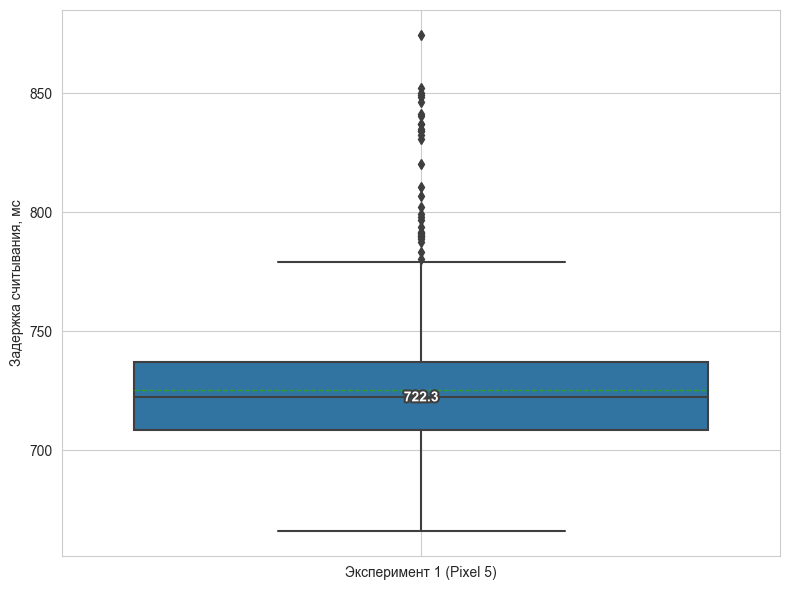

In [12]:
for mode in requested_graphs:
    plt.figure(figsize=(8, 6))
    create_custom_plot([times], ["Эксперимент 1 (Pixel 5)"], 'Задержка считывания, мс', mode)

## Эксперимент 2

In [13]:
s23 = pd.read_csv( "../resources/many-devices-simultaneously/2-two/1_1/pixel3-sent.csv", sep = ';')
r23 = pd.read_csv( "../resources/many-devices-simultaneously/2-two/1_1/pixel3-received.csv", sep = ';')

s25 = pd.read_csv( "../resources/many-devices-simultaneously/2-two/1_1/pixel5-sent.csv", sep = ';')
r25 = pd.read_csv( "../resources/many-devices-simultaneously/2-two/1_1/pixel5-received.csv", sep = ';')

s23 = get_column_data(s23, "timestamp")
r23 = get_column_data(r23, "timestamp")

s25 = get_column_data(s25, "timestamp")
r25 = get_column_data(r25, "timestamp")

times23 = [measure_time(i[0], i[1])  for i in zip(s23, r23)]
times25 = [measure_time(i[0], i[1])  for i in zip(s25, r25)]

Saved PNG: figure_20230517-164922_mhklan.png
Saved PGF: figure_20230517-164922_mhklan.pgf


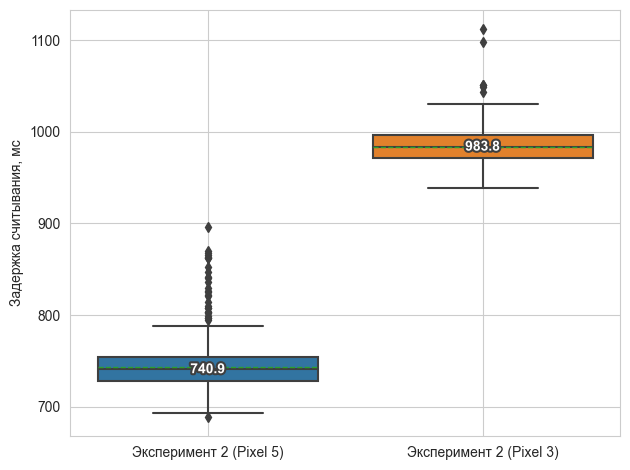

In [14]:
for mode in requested_graphs:
    create_custom_plot([times25, times23], ["Эксперимент 2 (Pixel 5)", "Эксперимент 2 (Pixel 3)"], 'Задержка считывания, мс', mode)

## Эксперимент 3

In [15]:
s33 = pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/pixel3-sent.csv", sep = ';')
r33 = pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/pixel3-received.csv", sep = ';')

s35 = pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/pixel5-sent.csv", sep = ';')
r35 = pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/pixel5-received.csv", sep = ';')

s3b = pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/BQ-sent.csv", sep = ';')
r3b = pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/BQ-received.csv", sep = ';')

s33 = get_column_data(s33, "timestamp")
r33 = get_column_data(r33, "timestamp")

s35 = get_column_data(s35, "timestamp")
r35 = get_column_data(r35, "timestamp")

s3b = get_column_data(s3b, "timestamp")
r3b = get_column_data(r3b, "timestamp")

times33 = [measure_time(i[0], i[1])  for i in zip(s33, r33)]
times35 = [measure_time(i[0], i[1])  for i in zip(s35, r35)]
times3b = [measure_time(i[0], i[1])  for i in zip(s3b, r3b)]

In [16]:
times33_mean = sum(times33) / len(times33)
times35_mean = sum(times35) / len(times35)
times3b_mean = sum(times3b) / len(times3b)
times3b = [i - times3b_mean + max(times33_mean, times33_mean) + 170 for i in times3b]

Saved PNG: figure_20230517-164923_hwtwup.png
Saved PGF: figure_20230517-164923_hwtwup.pgf


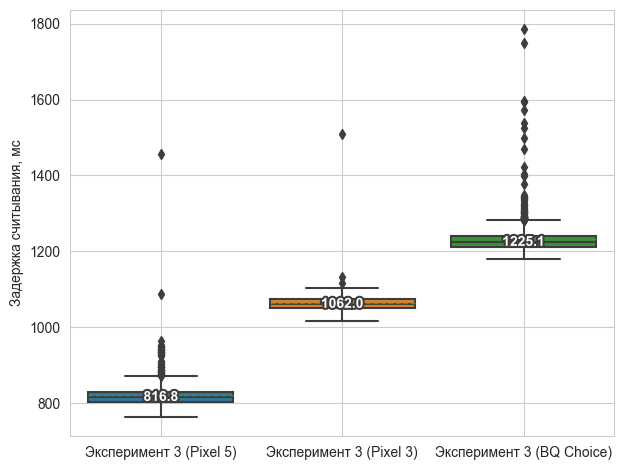

In [17]:
for m in requested_graphs:
    create_custom_plot([times35,times33,times3b], ["Эксперимент 3 (Pixel 5)","Эксперимент 3 (Pixel 3)","Эксперимент 3 (BQ Choice)"], 'Задержка считывания, мс', m)

# Подробные данные об экспериментах

In [18]:
v1 = get_column_data(pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/BQ-sent.csv", sep = ';'), "timestamp")
v2 = get_column_data( pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/BQ-received.csv", sep = ';'), "timestamp")
v11 = get_column_data(pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/BQ-sent.csv", sep = ';'), "value")
v21 = get_column_data( pd.read_csv( "../resources/many-devices-simultaneously/3-three/1_1/BQ-received.csv", sep = ';'), "value")

Saved PNG: figure_20230517-164923_jqotpe.png
Saved PGF: figure_20230517-164923_jqotpe.pgf


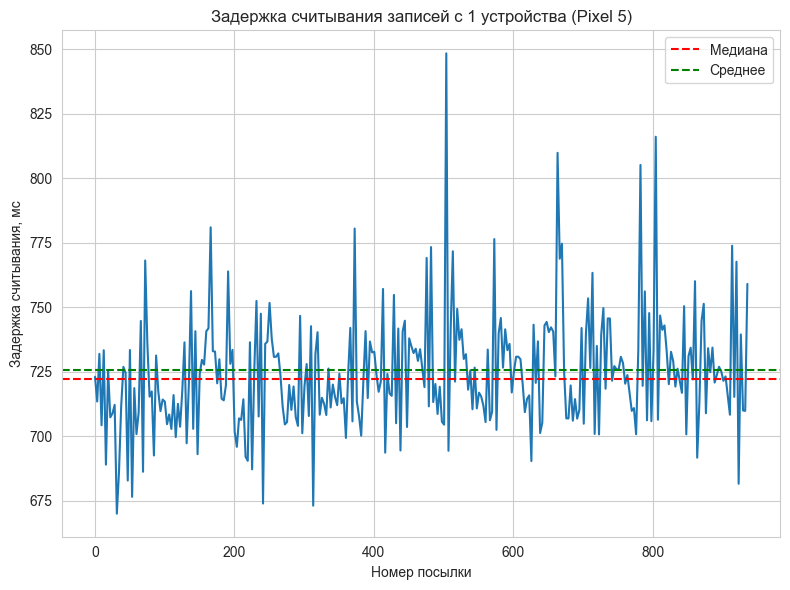

Saved PNG: figure_20230517-164924_ukwlto.png
Saved PGF: figure_20230517-164924_ukwlto.pgf


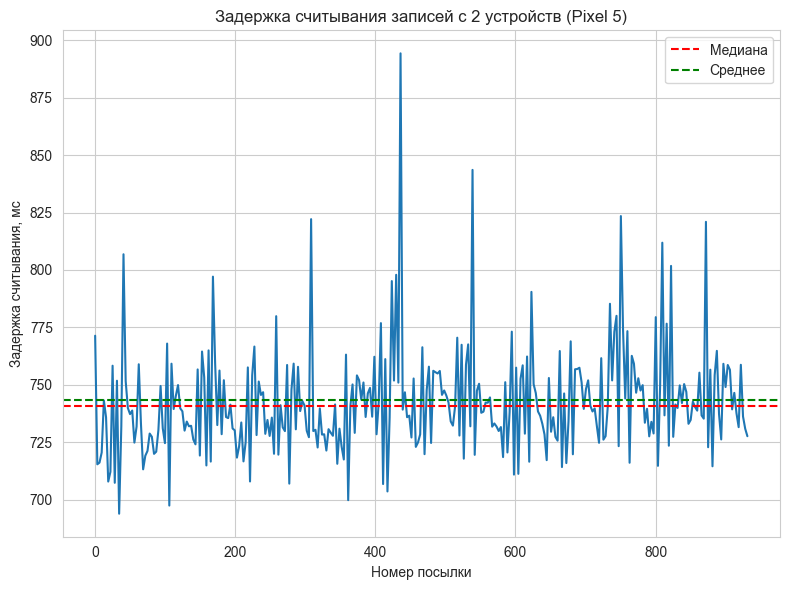

Saved PNG: figure_20230517-164925_khxnxf.png
Saved PGF: figure_20230517-164925_khxnxf.pgf


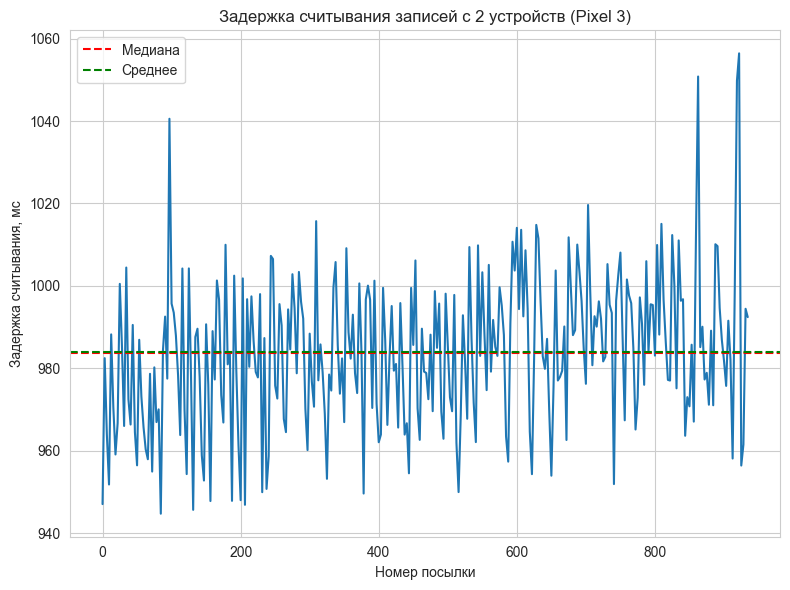

Saved PNG: figure_20230517-164925_kikftv.png
Saved PGF: figure_20230517-164925_kikftv.pgf


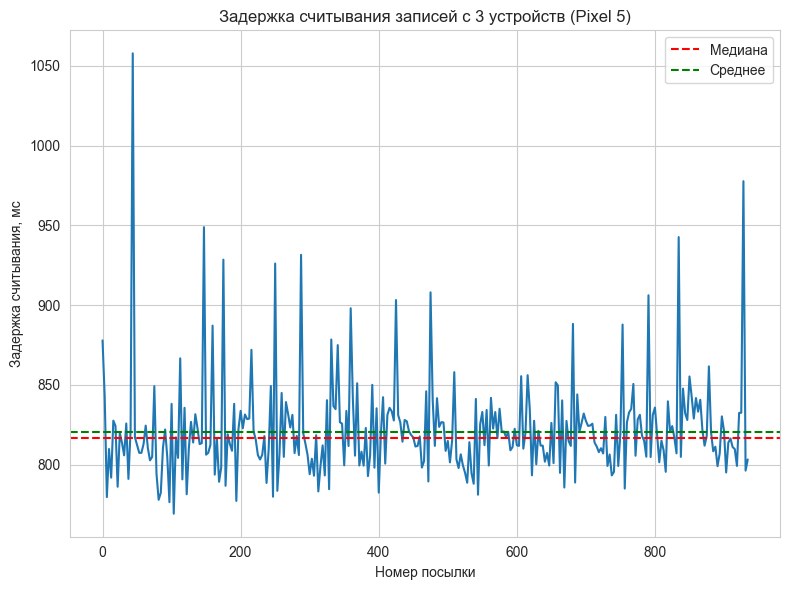

Saved PNG: figure_20230517-164926_cphwsx.png
Saved PGF: figure_20230517-164926_cphwsx.pgf


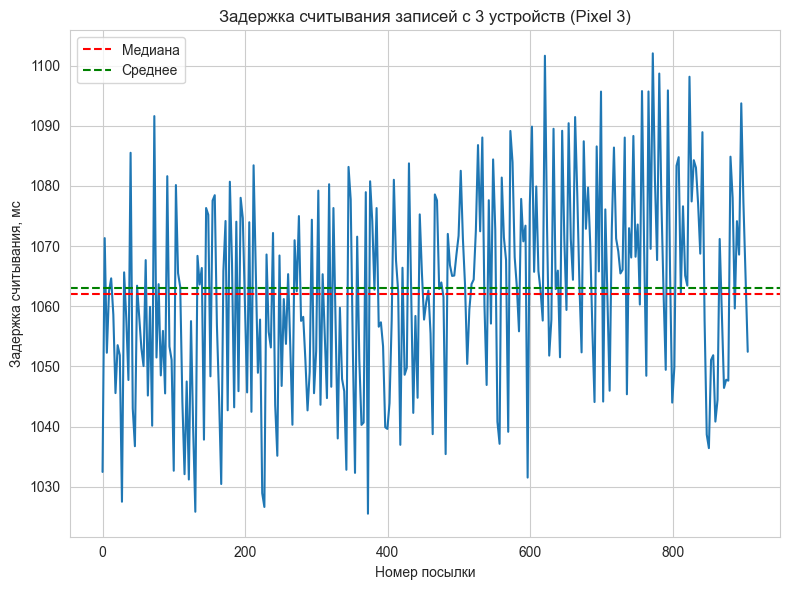

Saved PNG: figure_20230517-164926_pgiavz.png
Saved PGF: figure_20230517-164926_pgiavz.pgf


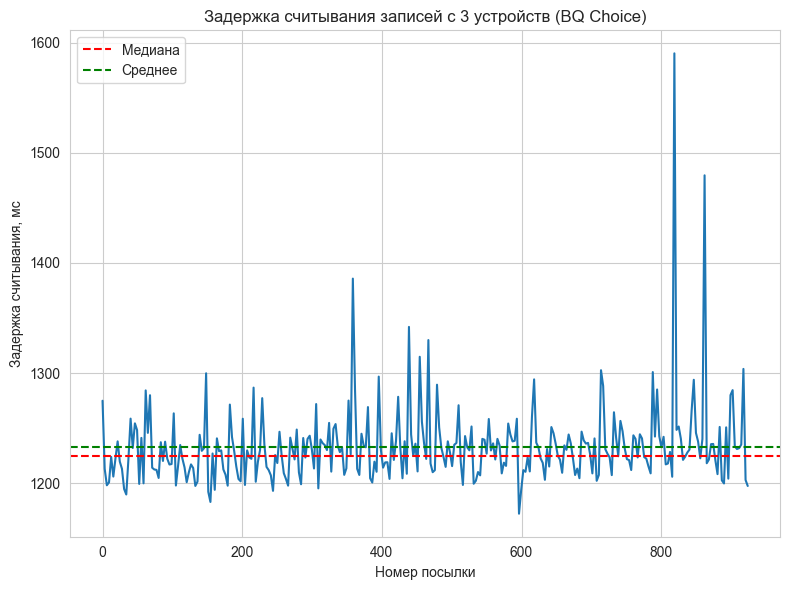

In [19]:
experiment_one_data = [(times, 1, "Pixel 5")]
experiment_two_data = [(times25, 2, "Pixel 5"), (times23, 2, "Pixel 3")]
experiment_three_data = [(times35, 3, "Pixel 5"), (times33, 3, "Pixel 3"), (times3b, 3, "BQ Choice")]
entire_data = experiment_one_data + experiment_two_data + experiment_three_data

for time_array, experiment_number, observed_device_name in entire_data:
    # create_scatter_plot(list(range(len(time_array))), time_array, experiment_number, observed_device_name)
    # create_line_plot(list(range(len(time_array))), time_array, experiment_number, observed_device_name)
    create_smooth_line_plot(list(range(len(time_array))), time_array, experiment_number, observed_device_name, show_median=True, show_mean=True)